In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import imageio.v2 as imageio
import matplotlib.pyplot as plt
from PIL import Image
#from random import shuffle
#import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
images=[]
labels=[]

In [3]:
paths = "/kaggle/input/utkface-new/UTKFace/"
files = os.listdir(paths)
size = len(files)
print("Total samples:",size)
print(files[0])
for image in os.listdir(paths):
    path = paths+image
    gender = path.split('/')[-1].split('_')[1]
    face = imageio.imread(path)
    face = cv2.resize(face, (85, 85))
    images.append(face)
    labels.append(int(gender))

Total samples: 23708
26_0_2_20170104023102422.jpg.chip.jpg


In [4]:
print("X : ", len(images))
print("Y : ", len(labels))

X :  23708
Y :  23708


In [5]:
X = np.array(images)
Y = np.array(labels)

X = X.astype('float32')

In [6]:
X[0].shape
X_data = np.squeeze(X)
X_data.shape

(23708, 85, 85, 3)

In [7]:
X_data /= 255

In [8]:
Y_data = to_categorical(Y, num_classes=2)

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y_data, test_size=0.2)
print(X_train.shape)

(18966, 85, 85, 3)


In [10]:
print(y_train.shape)

(18966, 2)


In [11]:
print(X_test.shape)
print(y_test.shape)

(4742, 85, 85, 3)
(4742, 2)


In [12]:
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu', input_shape=(85, 85, 3)),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(1000, activation='relu'),
  layers.Dense(2, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 85, 85, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 42, 42, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 42, 42, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 21, 21, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 128)       7

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train,y_train,batch_size=64,epochs=15,validation_data=(X_test, y_test),)

Epoch 1/15
297/297 [==============================] - 42s 137ms/step - loss: 0.4903 - accuracy: 0.7528 - val_loss: 0.3397 - val_accuracy: 0.8617
Epoch 2/15
297/297 [==============================] - 40s 136ms/step - loss: 0.3133 - accuracy: 0.8638 - val_loss: 0.2787 - val_accuracy: 0.8800
Epoch 3/15
297/297 [==============================] - 40s 136ms/step - loss: 0.2743 - accuracy: 0.8788 - val_loss: 0.2598 - val_accuracy: 0.8859
Epoch 4/15
297/297 [==============================] - 41s 138ms/step - loss: 0.2572 - accuracy: 0.8899 - val_loss: 0.2643 - val_accuracy: 0.8749
Epoch 5/15
297/297 [==============================] - 40s 136ms/step - loss: 0.2306 - accuracy: 0.9032 - val_loss: 0.2488 - val_accuracy: 0.8981
Epoch 6/15
297/297 [==============================] - 41s 137ms/step - loss: 0.2180 - accuracy: 0.9077 - val_loss: 0.2413 - val_accuracy: 0.8992
Epoch 7/15
297/297 [==============================] - 41s 137ms/step - loss: 0.2022 - accuracy: 0.9128 - val_loss: 0.2426 - val_ac

In [14]:
# Evaluate the model on test set
score = model.evaluate(X_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9013074636459351


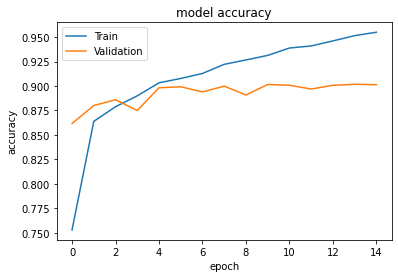

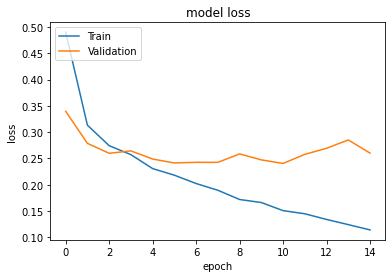

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [16]:
labels =["Male","Female"]

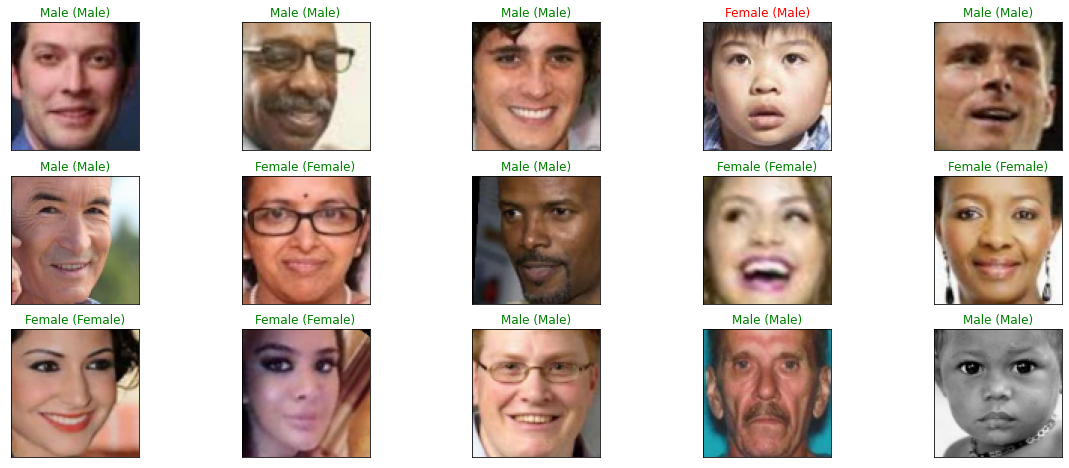

In [17]:
y_hat = model.predict(X_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(X_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(X_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(labels[predict_index], 
                                  labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))
plt.show()